In [12]:
# https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
#numpy.random.seed(7)

import evaluation

IMDB dataset from kaggle https://www.kaggle.com/c/word2vec-nlp-tutorial/data

In [9]:
def preprocessing(vocabulary_size, max_review_length):
    (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words= vocabulary_size)
    X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
    X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
    
    return X_train, y_train, X_test, y_test

vocabulary_size = 5000
max_review_length= 100
X_train, y_train, X_test, y_test= preprocessing(vocabulary_size, max_review_length)

In [10]:
def model_lstm(vocabulary_size, max_review_length):
    embedding_vecor_length = 32
    model = Sequential()
    model.add(Embedding(vocabulary_size, embedding_vecor_length, input_length= max_review_length))
    #model.add(LSTM(100))
    model.add( Bidirectional(LSTM(units=100, dropout=0.2, recurrent_dropout=0.2)))
    
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

model= model_lstm(vocabulary_size, max_review_length)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 32)           160000    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200)               106400    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 266,601
Trainable params: 266,601
Non-trainable params: 0
_________________________________________________________________
None


Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 179s 7ms/step - loss: 0.4834 - acc: 0.7650 - val_loss: 0.3659 - val_acc: 0.8429
Epoch 2/3
25000/25000 [==============================] - 173s 7ms/step - loss: 0.3305 - acc: 0.8623 - val_loss: 0.3486 - val_acc: 0.8461
Epoch 3/3
25000/25000 [==============================] - 172s 7ms/step - loss: 0.2941 - acc: 0.8820 - val_loss: 0.4003 - val_acc: 0.8391


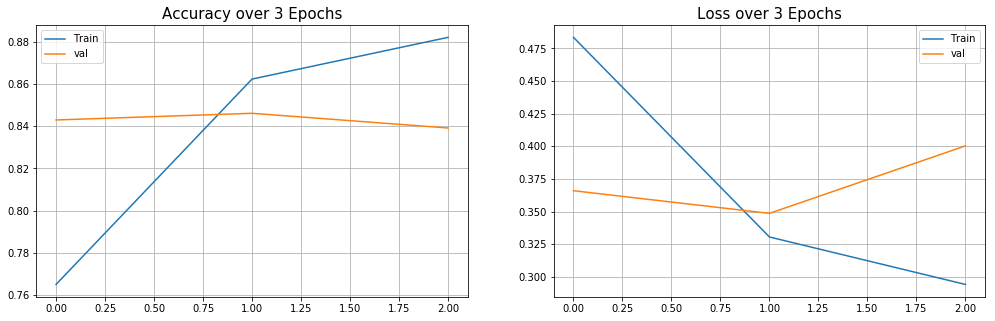

25000/25000 [==============================] - 105s 4ms/step
Accuracy: 83.91%
precision: 88.80%
recall: 77.61%
fscore: 82.83%


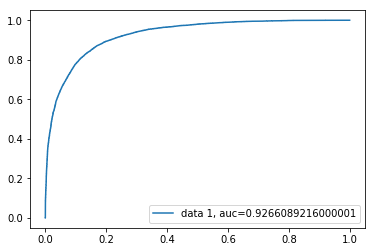

In [11]:
def train_model(model, X_train, X_test, y_train, y_test, epochs=3, batch_size=32):
    h= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)
    evaluation.accuracy_curve(h)
    evaluation.evaluate_model(model, X_test, y_test)

epochs=3
batch_size=64    
train_model(model, X_train, X_test, y_train, y_test, epochs, batch_size)